# Regresión lineal

En este script se encuentra:
    1. Carga de los datos
    2. Algunos elementos descriptivos
    3. Construcción del modelo
    4. Validación del modelo
    5. Uso del modelo para hacer predicciones

## 1. Carga de los datos

In [1]:
import pandas as pd                    ##Leer el archivo
import numpy as np                     ##Maneo de arrays, listas, matrices y transformar las variables 
import matplotlib.pyplot as plt        ##Necesario para implementar seaborn
import pandas_profiling as pp          ##Reporte descriptivo
import seaborn as sb                   ##Plots
import statsmodels.formula.api as stf  ##Regresion
import warnings                        ##Evitar los molestos warnings
from scipy import stats                ##Prueba de Shapiro-Wilks


C:\Users\Andrea\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Andrea\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Andrea\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Andrea\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Andrea\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Andrea\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Use

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("C:/Users/Andrea/Desktop/python-ml-course-master/datasets/ads/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 2. Algunos elementos descriptivos

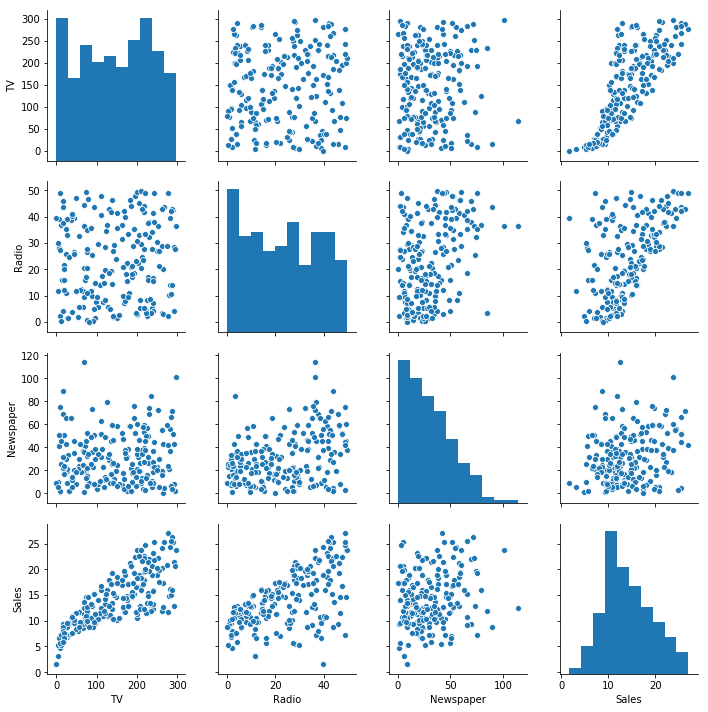

In [4]:
sb.pairplot(data)
plt.show()

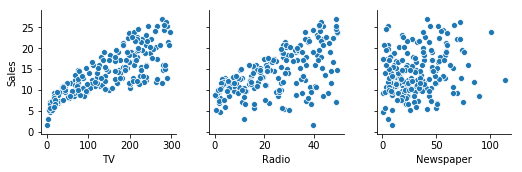

In [5]:
sb.pairplot(data, x_vars=["TV","Radio","Newspaper"], y_vars="Sales")
plt.show()

In [6]:
data.describe().round(1)

,TV,Radio,Newspaper,Sales
count,200.0,200.0,200.0,200.0
mean,147.0,23.3,30.6,14.0
std,85.9,14.8,21.8,5.2
min,0.7,0.0,0.3,1.6
25%,74.4,10.0,12.8,10.4
50%,149.8,22.9,25.8,12.9
75%,218.8,36.5,45.1,17.4
max,296.4,49.6,114.0,27.0


In [7]:
pp.ProfileReport(data)

Number of variables,4
Number of observations,200
Total Missing (%),0.0%
Total size in memory,6.3 KiB
Average record size in memory,32.4 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


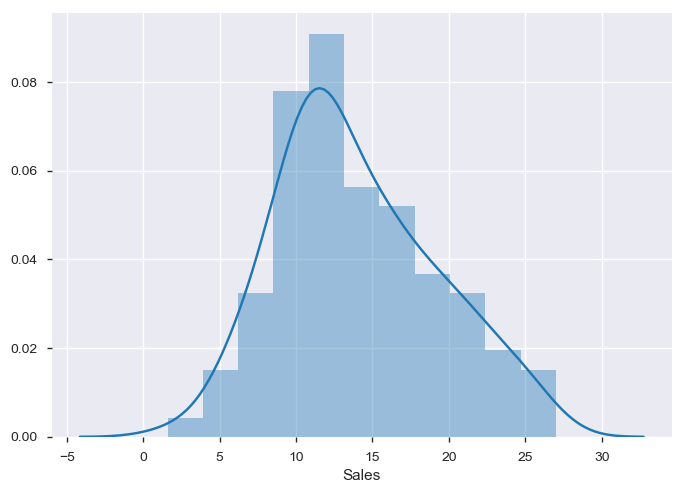

In [8]:
sb.distplot(data.Sales.dropna())

## 3. Construcción del modelo

Inicialmente se crea un modelo con todas las variables y se van a ir retirando bajo el criterio de ser significativas o no

In [9]:
lm=stf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           1.58e-96
Time:                        20:48:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
lm1=stf.ols(formula="Sales~TV+Radio+TV*Radio", data=data).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):          6.68e-146
Time:                        20:48:52   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
lm2=stf.ols(formula="Sales~TV+Radio", data=data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           4.83e-98
Time:                        20:48:52   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dado que el modelo que incluye la interacción presenta problemas de multicolinealidad, nos quedaremos con el último.
El primer warning puede ser ignorado, siempre se asume.

## 4. Validación del modelo

#### Verificando la normalidad de los residuales

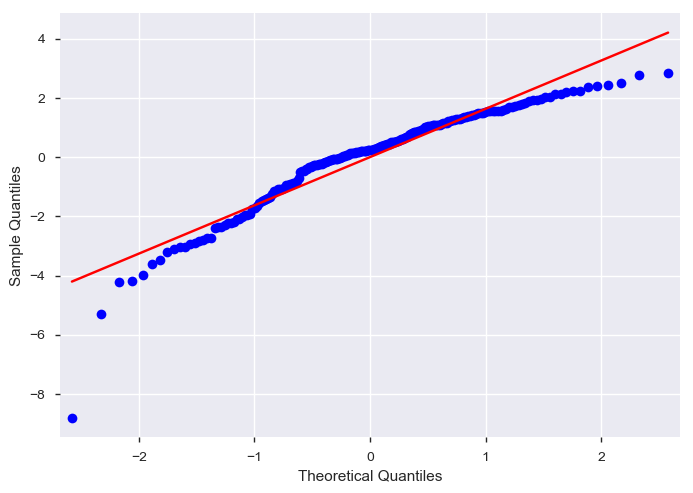

In [13]:
import statsmodels.api as sm
fig=sm.qqplot(lm2.resid, line='r')

#### Distribución de los residuales

Text(0.5,0,'Residuales')

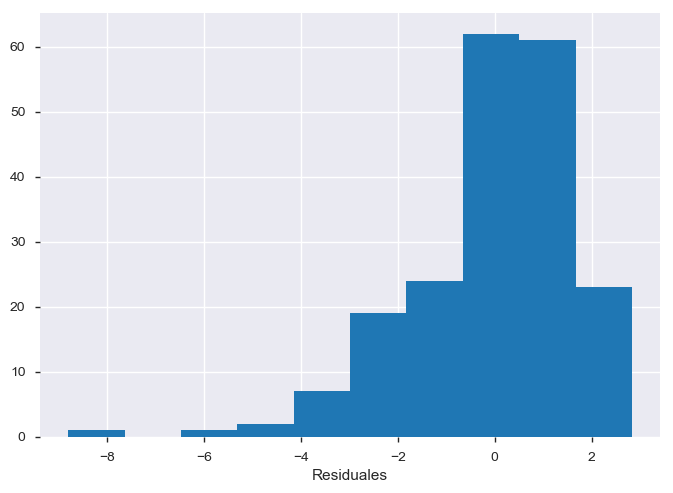

In [14]:
plt.hist(lm2.resid)
plt.xlabel("Residuales")

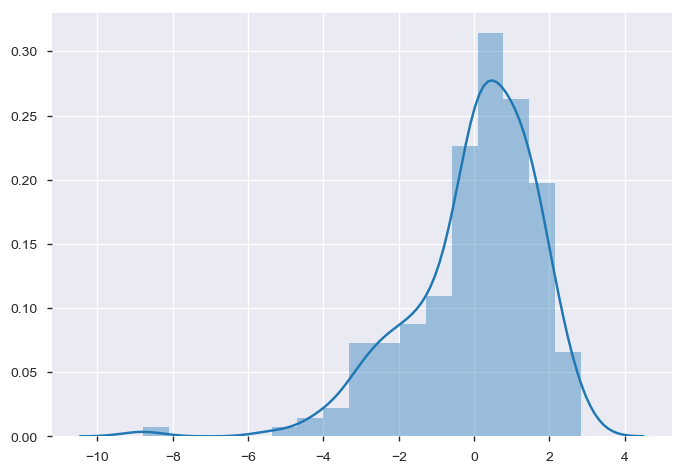

In [15]:
sb.distplot(lm2.resid)
plt.show()

In [16]:
stat, p = stats.shapiro(lm2.resid)
print('Estadístico=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Estadístico=0.918, p=0.000
Sample does not look Gaussian (reject H0)


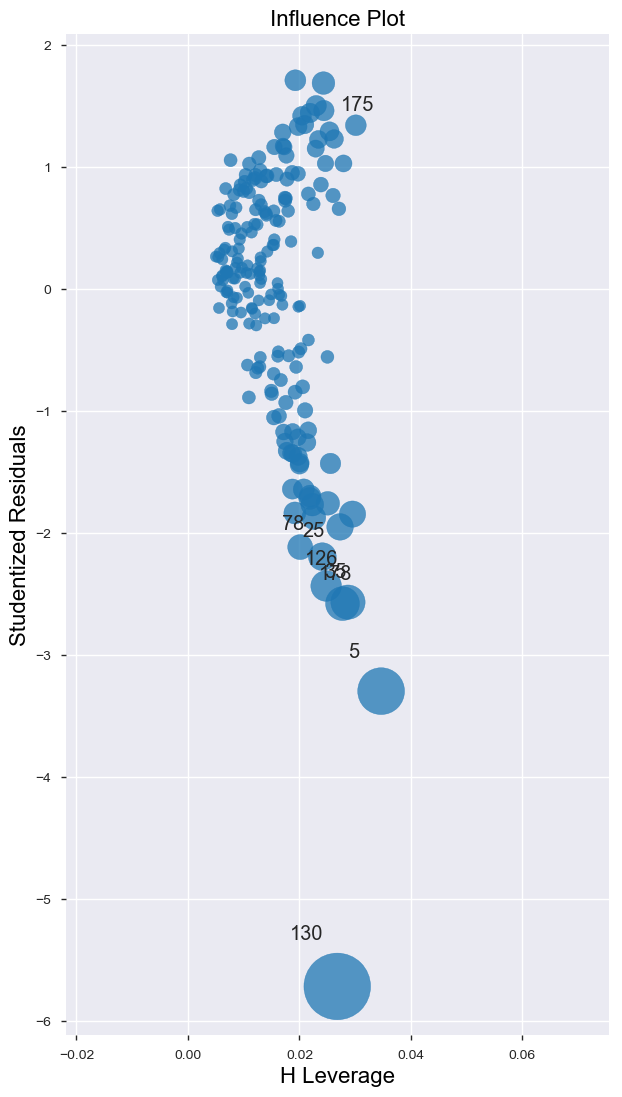

In [17]:
fig, ax = plt.subplots(figsize=(7,13))
fig = sm.graphics.influence_plot(lm2, ax=ax, criterion="cooks")

In [18]:
 data.loc[[130,175],:]

,TV,Radio,Newspaper,Sales
130,0.7,39.6,8.7,1.6
175,276.9,48.9,41.8,27.0


In [19]:
df=data.drop(data.index[[130,175]])

#### Construyendo un nuevo modelo (Volviendo al paso 3)

In [20]:
df['tv_sqr']=np.sqrt(df['TV'])

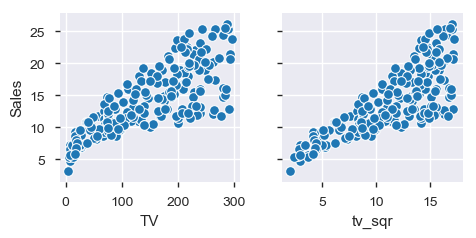

In [21]:
sb.pairplot(df, x_vars=["TV","tv_sqr"], y_vars="Sales")
plt.show()

In [22]:
lm=stf.ols(formula="Sales~np.sqrt(TV)+Radio", data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1334.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):          1.68e-114
Time:                        20:48:54   Log-Likelihood:                -336.46
No. Observations:                 198   AIC:                             678.9
Df Residuals:                     195   BIC:                             688.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.3677      0.316     -4.334      0.000      -1.990      -0.745
np.sqrt(TV)     0.9530      0.023     40.813      0.000       0.907       0.999
Radio           0.1950      0.006     30.277      0.000       0.182       0.208
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.081
Skew:                           0.033   Prob(JB):                        0.960
Kurtosis:                       2.927   Cond. No.                         97.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Identificando posibles puntos de influencia

#### Viendo la relación entre residuales y valores ajustados

In [23]:
df['Residuales']=lm.resid
df['Prediccion']=lm.fittedvalues

In [24]:
df.head()

,TV,Radio,Newspaper,Sales,tv_sqr,Residuales,Prediccion
0,230.1,37.8,69.2,22.1,15.169047,1.640407,20.459593
1,44.5,39.3,45.1,10.4,6.670832,-2.253288,12.653288
2,17.2,45.9,69.3,9.3,4.147288,-2.235378,11.535378
3,151.5,41.3,58.5,18.5,12.308534,0.083964,18.416036
4,180.8,10.8,58.4,12.9,13.446189,-0.652578,13.552578


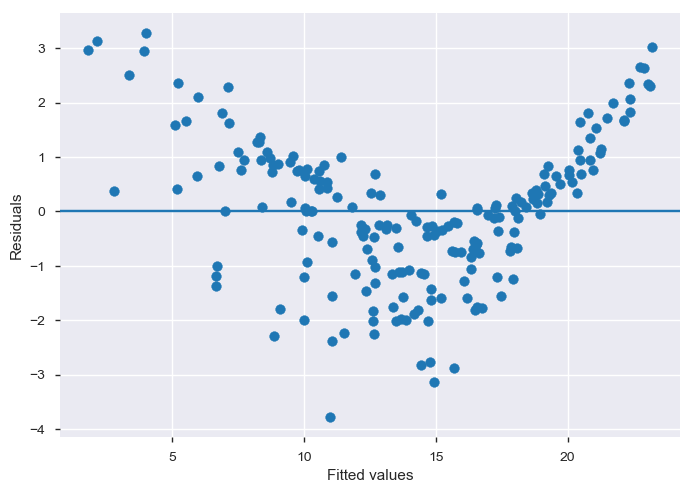

In [25]:
plt.scatter(lm.fittedvalues, lm.resid)
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.axhline(0)

Text(0.5,0,'Fitted values')

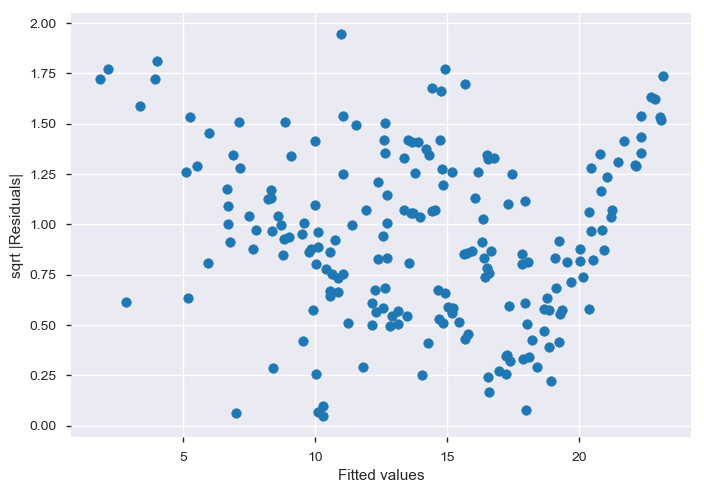

In [26]:
plt.scatter(lm.fittedvalues, np.sqrt(abs(lm.resid)))
plt.ylabel("sqrt |Residuals|")
plt.xlabel("Fitted values")

In [27]:
ddf = pd.DataFrame({'x':lm.fittedvalues,'y':np.sqrt(abs(lm.resid))})
dmod = stf.ols('y ~ x',data=ddf).fit()
dmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.676
Date:                Thu, 07 Mar 2019   Prob (F-statistic):              0.197
Time:                        20:48:55   Log-Likelihood:                -108.05
No. Observations:                 198   AIC:                             220.1
Df Residuals:                     196   BIC:                             226.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0404      0.090     11.501      0.000       0.862       1.219
x             -0.0079      0.006     -1.295      0.197      -0.020       0.004
==============================================================================
Omnibus:                        7.126   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                3.715
Skew:                           0.065   Prob(JB):                        0.156
Kurtosis:                       2.342   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

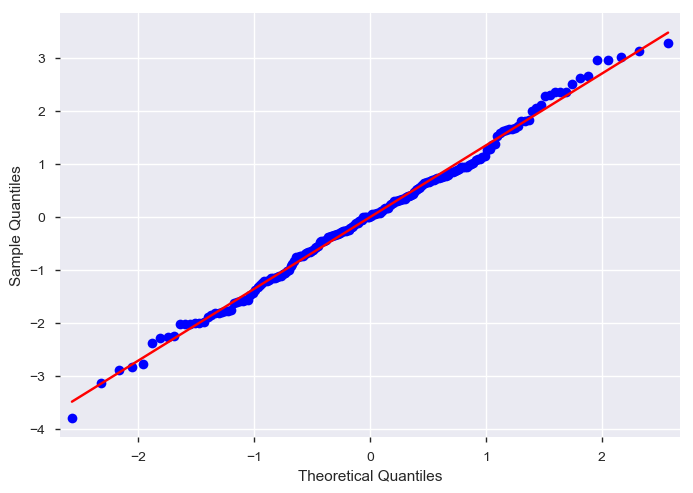

In [28]:
import statsmodels.api as sm
fig=sm.qqplot(lm.resid, line='r')

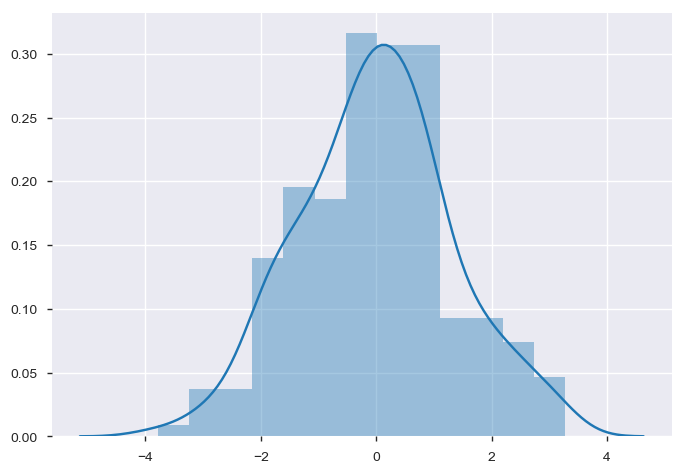

In [29]:
sb.distplot(lm.resid)
plt.show()

In [30]:
stat, p = stats.shapiro(lm.resid)
print('Estadístico=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Estadístico=0.994, p=0.676
Sample looks Gaussian (fail to reject H0)


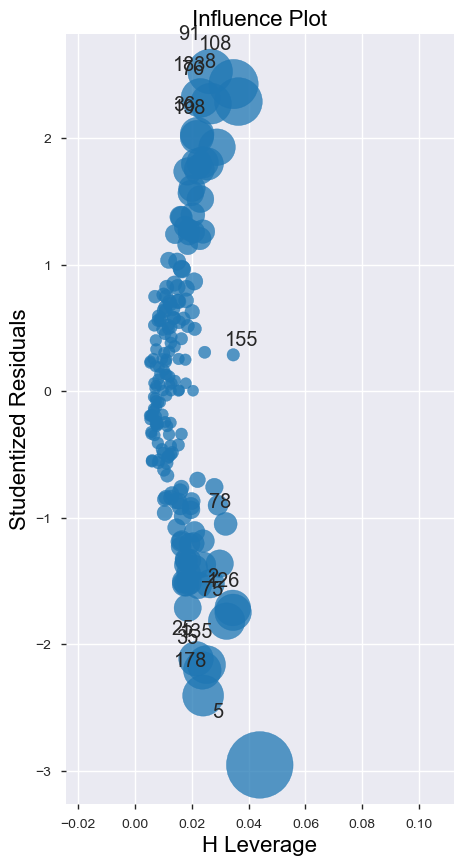

In [31]:
fig, ax = plt.subplots(figsize=(5,10))
fig = sm.graphics.influence_plot(lm, ax=ax, criterion="cooks")

## 5. Usando el modelo

#### En una observación puntual

In [32]:
x0 = pd.DataFrame([{"TV":1,"Radio": 8.426}])
x0

,Radio,TV
0,8.426,1


In [33]:
lm.predict(x0)

0    1.228399
dtype: float64

#### En un conjunto de datos

In [34]:
from numpy.random import randn
np.random.seed(1)

In [35]:
X = pd.DataFrame([[276,50],[230.1, 37.8],[100,15]],index='A B C '.split(),columns='TV Radio'.split())
X

,TV,Radio
A,276.0,50.0
B,230.1,37.8
C,100.0,15.0


In [36]:
lm.predict(X)

A    24.214977
B    20.459593
C    11.087374
dtype: float64

In [37]:
X['Prediccion']=np.array(list(lm.predict(X)))

In [38]:
X

,TV,Radio,Prediccion
A,276.0,50.0,24.214977
B,230.1,37.8,20.459593
C,100.0,15.0,11.087374
